# Instalando as bibliotecas necessarias


In [2]:
import requests as rq
import pathlib as path
import pandas as pd
import json
import shutil
import urllib.request
import os
import zipfile
import time
from IPython.display import Image
from IPython.display import clear_output
import io

%matplotlib inline

url_api = "https://localhost:44346/v1/Demo/"
#url_api = "https://localhost:5001/v1/Demo/"

# DOWNLOAD DAS PARTIDAS

Será feito o download de mais de 450 demos e armazenadas em um json para maior facilidade de manuseio

## Agora vamos consumir a API e seus métodos

### Metodo GetPlayers, retorna todos os dados dos jogadores das demos baixadas acima

In [ ]:
index = 1;
start = time.time()

print("Baixando todas partidas demo...")

for link in ligas['demo']:
    filedata = urllib.request.urlopen(link)
    data = filedata.read()
    start = time.time()
    mypath = "partidas"
    
    if not os.path.exists(mypath):
        os.makedirs(mypath, 0o0755)
        print("Pasta criada.")
    
    fileName = mypath + "/" + "partida" + str(index) + ".rar"
    
    with open(fileName, 'wb') as f:
        f.write(data)
        
    with zipfile.ZipFile(fileName) as zip_ref:
        zip_ref.extractall('partidas')
        
    os.remove(fileName)
    
    end = time.time()
    tempoDecorrido = end - start
    print(str(fileName) + " baixada em " + str(tempoDecorrido) + "s")
    
    index+=1;
    

end = time.time()
tempoDecorrido = end - start
print("Todas as partidas baixadas em " + str(tempoDecorrido) + "s")

## Agora vamos consumir a API e seus métodos

### Metodo GetPlayers, retorna todos os dados dos jogadores das demos baixadas acima

In [ ]:
def GetNamesWeapon(data):
    result = ['Name', 'TeamName', 'Killed', 'Death', 'ADR', 'TotalDamageDealt', 'RoundMVPs', 'FlashAssists', 'BombsPlanted', 'Clutches', 'FirstKills', 'FirstDeaths', 'FlashedEnemies', 'WalkQuantityAsTR',
              'DistanceTraveledAsTR', 'DistanceTraveledAsCT']
    for player in data: 
        for weapon in player['Weapons']:
            if weapon['NameWeapon'] not in result:
                result.append(weapon['NameWeapon'])
    return result
                  
def GetInfoWeaponPlayer(name, weapons, jsonResult):
    print()
    dic = {weapon['NameWeapon']: int(weapon['KillQuantity']) for weapon in weapons }
    dic['Name']                 = name
    dic['TeamName']             = jsonResult['TeamName']
    dic['Killed']               = jsonResult['Killed']
    dic['Death']                = jsonResult['Death']
    dic['ADR']                  = jsonResult['ADR']
    dic['TotalDamageDealt']     = jsonResult['TotalDamageDealt']
    dic['RoundMVPs']            = jsonResult['RoundMVPs']
    dic['FlashAssists']         = jsonResult['FlashAssists']
    dic['BombsPlanted']         = jsonResult['BombsPlanted']
    dic['Clutches']             = jsonResult['Clutches']
    dic['FirstKills']           = jsonResult['FirstKills']
    dic['FirstDeaths']          = jsonResult['FirstDeaths']
    dic['FlashedEnemies']       = jsonResult['FlashedEnemies']
    dic['WalkQuantityAsTR']     = jsonResult['WalkQuantityAsTR']
    dic['DistanceTraveledAsTR'] = jsonResult['DistanceTraveledAsTR']
    dic['DistanceTraveledAsCT'] = jsonResult['DistanceTraveledAsCT']## Agora vamos consumir a API e seus métodos

### Metodo GetPlayers, retorna todos os dados dos jogadores das demos baixadas acima
    return dic

In [ ]:
jsonResult = json.loads(rq.get(url_api + "GetPlayers", verify=False).content)

playerWeaponsArray = []

#pego o nome de todas as armas para fazer de colunas
weaponsArray = GetNamesWeapon(jsonResult)
for player in jsonResult:
    playerWeaponsArray.append(GetInfoWeaponPlayer(player['Name'], player['Weapons'], player))

df = pd.DataFrame(data=playerWeaponsArray, columns=weaponsArray)
df = df.fillna(0)
df.to_csv("LiquidVPPlayersStats.csv")
df.head()

In [ ]:
jsonResult = rq.get(url_api + "GetPlayers", verify=False).content
df = pd.read_json(jsonResult)
df.drop(['Weapons'], axis=1, inplace=True)

In [ ]:
df.to_csv("AllPlayersStats.csv")
df

## Filtrando dados

In [12]:
#roles = pd.read_csv("PlayersRoles180.csv")
roles = pd.read_csv("rolesTest.csv")
roles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        19 non-null     int64 
 1   Name      19 non-null     object
 2   TeamName  19 non-null     object
 3   Role      19 non-null     object
dtypes: int64(1), object(3)
memory usage: 736.0+ bytes


In [13]:
players = pd.read_csv("AllPlayersStats2.csv")
players.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
players.insert(1, 'Role', "")

cols = players.columns.tolist()
playersRolesDF = pd.DataFrame(columns=cols)

players = players.fillna(0)
players.head()

,ID,Role,Name,TeamName,Killed,Death,ADR,TotalDamageDealt,RoundMVPs,LastAliveQuantity,...,WalkQuantityAsTR,WalkQuantityAsCT,DistanceTraveledAsTR,DistanceTraveledAsCT,AK47Kills,MAC10Kills,M4A4Kills,MP9Kills,AWPKills,ScoutKills
0,0,,★ ⑳ leandraco,Flow Nocturns Gaming,0.220930,0.223404,0.242430,0.242430,0.000,0.071429,...,0.209765,7411,0.197286,108434.40,0.322581,0.0,0.142857,0.0,0.000000,0.00
1,1,,★ ⑳ matinaso,Flow Nocturns Gaming,0.162791,0.234043,0.173980,0.173980,0.125,0.071429,...,0.189957,5406,0.201223,95097.13,0.193548,0.0,0.571429,0.0,0.090909,0.00
2,2,,★ ⑳ t4MAg,Flow Nocturns Gaming,0.220930,0.170213,0.175884,0.175884,0.125,0.285714,...,0.207352,5890,0.202682,108803.14,0.193548,0.0,0.000000,0.0,0.181818,0.25
3,3,,★ ⑳ sheep,Flow Nocturns Gaming,0.139535,0.202128,0.161559,0.161559,0.250,0.357143,...,0.217555,7660,0.196442,101343.74,0.258065,0.0,0.142857,0.0,0.000000,0.00
4,4,,★ ⑳ limi7,Flow Nocturns Gaming,0.255814,0.170213,0.246147,0.246147,0.500,0.214286,...,0.175372,6444,0.202366,104005.83,0.032258,0.0,0.142857,0.0,0.727273,0.75


In [14]:
for index, row in roles.iterrows():
    player = players.loc[players['Name'] == row['Name']]
    if (row['Role'] != 'IGL'):
        player['Role'] = row['Role']
        playersRolesDF = pd.concat([playersRolesDF, player])

playersRolesDF.head()

<ipython-input-14-2f0dc4354c12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player['Role'] = row['Role']


,ID,Role,Name,TeamName,Killed,Death,ADR,TotalDamageDealt,RoundMVPs,LastAliveQuantity,...,WalkQuantityAsTR,WalkQuantityAsCT,DistanceTraveledAsTR,DistanceTraveledAsCT,AK47Kills,MAC10Kills,M4A4Kills,MP9Kills,AWPKills,ScoutKills
1171,1171,Entry Fragger,★ ⑳ De$tiNy,Paquetá Gaming,0.311927,0.223684,0.323816,0.323816,0.428571,0.250,...,0.199952,8868,0.205858,140072.68,0.333333,0.0,0.571429,0.0,0.000000,0.0
1278,1278,Entry Fragger,★ ⑳ De$tiNy,Paquetá Gaming,0.226190,0.197183,0.224144,0.224144,0.250000,0.000,...,0.233718,1927,0.199350,35350.32,0.250000,0.0,0.571429,0.0,0.000000,0.0
2067,2067,Entry Fragger,★ ⑳ De$tiNy,Paquetá Gaming,0.228261,0.163636,0.228031,0.228031,0.312500,0.375,...,0.163326,6887,0.170694,102179.34,0.461538,0.0,0.411765,0.0,0.000000,0.0
1173,1173,Suporte,★ ⑳ KHTEXy,Paquetá Gaming,0.183486,0.171053,0.155903,0.155903,0.142857,0.250,...,0.205348,4802,0.207366,129496.79,0.083333,1.0,0.142857,0.0,0.526316,0.0
1277,1277,Suporte,★ ⑳ KHTEXy,Paquetá Gaming,0.190476,0.211268,0.215258,0.215258,0.166667,0.300,...,0.203399,2148,0.194115,38143.69,0.305556,0.0,0.285714,0.0,0.000000,0.0


In [15]:
#playersRolesDF.drop(['ID', 'Name', 'TeamName', 'DistanceTraveledAsCT', 'Knife', 'P250', 'Desconhecido', 'DualBarettas', 'Swag7', 'Zeus', 'P90', 'XM1014', 'MP7', 'MP5SD', 'Nova', 'M249', 'World', 'Scar20', 'Negev', 'Bizon', 'SawedOff', 'G3SG1', 'P2000'], axis=1, inplace=True)
#playersRolesDF.drop(['ID', 'Name', 'TeamName', 'DistanceTraveledAsCT', 'DistanceTraveledAsTR', 'WalkQuantityAsTR', 'Knife'], axis=1, inplace=True)
playersRolesDF.drop(['ID', 'Name', 'TeamName', 'WalkQuantityAsCT', 'DistanceTraveledAsCT'], axis=1, inplace=True)

In [16]:
#dataFrame = playersRolesDF.drop('Role', axis=1)
df = playersRolesDF.round(decimals=2)
#dataframe.to_csv('playersRolesDF3.csv')
dataFrame = pd.DataFrame(df)
dataFrame

,Role,Killed,Death,ADR,TotalDamageDealt,RoundMVPs,LastAliveQuantity,Clutches,FirstKills,FirstDeaths,...,FlashAssists,BombsPlanted,WalkQuantityAsTR,DistanceTraveledAsTR,AK47Kills,MAC10Kills,M4A4Kills,MP9Kills,AWPKills,ScoutKills
1171,Entry Fragger,0.31,0.22,0.32,0.32,0.43,0.25,0.00,0.28,0.00,...,0.00,0.22,0.20,0.21,0.33,0.0,0.57,0.0,0.00,0.00
1278,Entry Fragger,0.23,0.20,0.22,0.22,0.25,0.00,0.00,0.13,0.57,...,0.38,0.00,0.23,0.20,0.25,0.0,0.57,0.0,0.00,0.00
2067,Entry Fragger,0.23,0.16,0.23,0.23,0.31,0.38,1.00,0.00,0.29,...,0.00,0.00,0.16,0.17,0.46,0.0,0.41,0.0,0.00,0.00
1173,Suporte,0.18,0.17,0.16,0.16,0.14,0.25,0.00,0.06,0.14,...,1.00,0.33,0.21,0.21,0.08,1.0,0.14,0.0,0.53,0.00
1277,Suporte,0.19,0.21,0.22,0.22,0.17,0.30,0.25,0.13,0.00,...,0.25,0.11,0.20,0.19,0.31,0.0,0.29,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,Lurker,0.18,0.21,0.21,0.21,0.00,0.33,0.00,0.07,0.08,...,0.17,0.09,0.22,0.19,0.20,0.0,0.19,0.0,0.10,0.33
4423,Lurker,0.24,0.19,0.25,0.25,0.33,0.05,0.00,0.21,0.24,...,0.25,0.25,0.22,0.21,0.30,0.0,0.34,0.0,0.00,0.00
3808,Suporte,0.14,0.23,0.16,0.16,0.15,0.09,0.00,0.12,0.29,...,0.29,0.17,0.21,0.19,0.20,0.0,0.08,0.0,0.00,0.00
4083,Suporte,0.22,0.20,0.21,0.21,0.62,0.11,0.00,0.07,0.23,...,0.00,0.36,0.20,0.21,0.26,0.0,0.25,0.0,0.20,0.67


## Regressão Logística

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

%matplotlib inline

               precision    recall  f1-score   support

        AWPer       1.00      1.00      1.00         8
Entry Fragger       1.00      1.00      1.00         1
       Lurker       0.50      1.00      0.67         1
      Suporte       1.00      0.83      0.91         6

     accuracy                           0.94        16
    macro avg       0.88      0.96      0.89        16
 weighted avg       0.97      0.94      0.95        16



<AxesSubplot:>

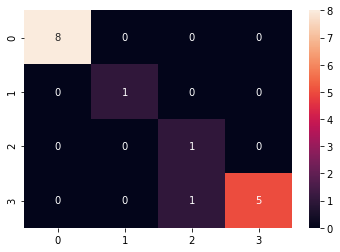

In [17]:
score = 0
while (score <= 0.9):
    X_train, X_test, y_train, y_test = train_test_split(dataFrame.drop('Role', axis=1), dataFrame['Role'])
    model = LogisticRegression(multi_class='multinomial', max_iter=10000000000000)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    score = model.score(X_test, y_test)
    clear_output(wait=True)

print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

               precision    recall  f1-score   support

        AWPer       1.00      1.00      1.00         8
Entry Fragger       1.00      1.00      1.00         1
       Lurker       0.50      1.00      0.67         1
      Suporte       1.00      0.83      0.91         6

     accuracy                           0.94        16
    macro avg       0.88      0.96      0.89        16
 weighted avg       0.97      0.94      0.95        16



<AxesSubplot:>

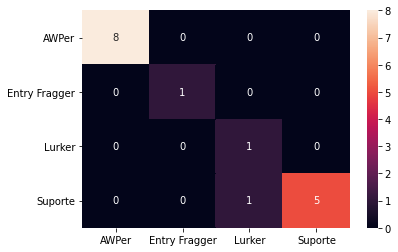

In [22]:
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, xticklabels=['AWPer', 'Entry Fragger', 'Lurker', 'Suporte'], yticklabels=['AWPer', 'Entry Fragger', 'Lurker', 'Suporte'])

### Árvore de decisão

In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)

tree.plot_tree(clf, filled=True)
fig.savefig('DecisionTree.png')

### Salvar o modelo

In [ ]:
fileName = '../PythonScript/models/model94.pkl'
with open(fileName, 'wb') as file:
    pickle.dump(model, file)

### Predict one player

In [4]:
casual_players = pd.read_csv('MyDemoStats.csv')
casual_players.head()

,Unnamed: 0,Role,Killed,Death,ADR,TotalDamageDealt,RoundMVPs,LastAliveQuantity,Clutches,FirstKills,...,FlashAssists,BombsPlanted,WalkQuantityAsTR,DistanceTraveledAsTR,AK47Kills,MAC10Kills,M4A4Kills,MP9Kills,AWPKills,ScoutKills
0,0,NaN,0.16,0.20,0.19,0.19,0.00,0.15,NaN,0.17,...,0.17,0.29,0.21,0.20,0.17,0.33,0.24,0.2,0.00,0
1,1,NaN,0.23,0.20,0.25,0.25,0.33,0.08,NaN,0.17,...,0.17,0.29,0.20,0.19,0.08,0.33,0.29,0.0,0.33,0
2,2,NaN,0.21,0.19,0.20,0.20,0.17,0.23,NaN,0.17,...,0.17,0.14,0.20,0.20,0.29,0.00,0.00,0.8,0.33,1
3,3,NaN,0.14,0.20,0.13,0.13,0.33,0.23,NaN,0.17,...,0.33,0.29,0.22,0.21,0.12,0.00,0.00,0.0,0.33,0
4,4,NaN,0.26,0.21,0.23,0.23,0.17,0.31,NaN,0.33,...,0.17,0.00,0.17,0.20,0.33,0.33,0.47,0.0,0.00,0


In [5]:
casual_players.drop(['Unnamed: 0', 'Name', 'TeamName', 'WalkQuantityAsCT', 'DistanceTraveledAsCT'], axis=1, inplace=True)

KeyError: "['Name' 'TeamName' 'WalkQuantityAsCT' 'DistanceTraveledAsCT'] not found in axis"

In [7]:
casual_players.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
casual_players = casual_players.fillna(0)

In [ ]:
casual_players = casual_players.round(decimals=2)
casual_players.insert(0, 'Role', '')
casual_players = casual_players.fillna(0)
casual_players

### Adiciona colunas faltantes comparado ao modelo de treino para que seja possivel fazer a predição

In [ ]:
allPlayers_cols = playersRolesDF.columns.to_list()
casual_players_cols = casual_players.columns.to_list()

for i in range(len(playersRolesDF.columns.to_list())):
    if allPlayers_cols[i] in casual_players.columns:
        continue
    else:
        casual_players.insert(i, allPlayers_cols[i], 0)

#casual_players.drop(['Unnamed: 0', 'Desconhecido', 'Name', 'TeamName', 'DistanceTraveledAsCT', 'WalkQuantityAsTR', 'DistanceTraveledAsTR', 'Knife'], axis=1, inplace=True)
casual_players.drop(['Unnamed: 0', 'Desconhecido', 'Name', 'TeamName', 'DistanceTraveledAsCT', 'WalkQuantityAsTR', 'DistanceTraveledAsTR'], axis=1, inplace=True)
#casual_players.drop(['Desconhecido', 'Name', 'TeamName', 'DistanceTraveledAsCT'], axis=1, inplace=True)
casual_players.head()        

In [ ]:
casual_players_count = len(casual_players.columns)
playersRoles_count = len(playersRolesDF.columns)
print(casual_players_count)
print(casual_players.columns)
print(playersRoles_count)
print(playersRolesDF.columns)

if (casual_players_count < playersRoles_count):
    for i in range(playersRoles_count - casual_players_count):
        casual_players.insert(casual_players_count, i, 0)
        casual_players_count = len(casual_players.columns)

print("===================================================================================")
print(casual_players_count)
print(casual_players.columns)
print(playersRoles_count)
print(playersRolesDF.columns)

In [ ]:
#casual_players.drop(['Unnamed: 0'], axis=1, inplace=True)
casual_players = casual_players.fillna(0)
casual_players.head()

In [ ]:
score = model.score(X_test, y_test)
print(score)

In [ ]:
predictions_proba = model.predict_proba(casual_players.drop('Role', axis=1))
predictions = model.predict(casual_players.drop('Role', axis=1))
#predictions_proba = loaded_model.predict_proba(X_test)
#predictions = loaded_model.predict(X_test)

np.set_printoptions(suppress=True)
print(predictions_proba)
print(predictions)

### Carregando modelo salvo

In [10]:
with open('models/model94.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
predictions_proba = loaded_model.predict_proba(casual_players.drop('Role', axis=1))
predictions = loaded_model.predict(casual_players.drop('Role', axis=1))
#predictions_proba = loaded_model.predict_proba(X_test)
#predictions = loaded_model.predict(X_test)

np.set_printoptions(suppress=True)

print(predictions_proba)
print(predictions)

[[0.10844694 0.2692717  0.23505977 0.38722159]
 [0.2494842  0.25756158 0.1620869  0.33086732]
 [0.18528048 0.06806617 0.35503162 0.39162173]
 [0.34558951 0.17733696 0.16399226 0.31308126]
 [0.09216698 0.40406095 0.29363274 0.21013933]
 [0.2470533  0.25701856 0.24101155 0.25491659]
 [0.15089265 0.27049441 0.21761899 0.36099395]
 [0.55901964 0.16892844 0.12335779 0.14869412]
 [0.11418394 0.3510142  0.27551055 0.25929132]
 [0.09012895 0.38619983 0.19094144 0.33272977]]
['Suporte' 'Suporte' 'Suporte' 'AWPer' 'Entry Fragger' 'Entry Fragger'
 'Suporte' 'AWPer' 'Entry Fragger' 'Entry Fragger']


In [11]:
print(classification_report(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

NameError: name 'y_test' is not defined

### Metodo GetHeatMap, retorna um mapa de calor da dust2 onde é possível ver onde os jogadores tiveram uma interação e onde eles foram mortos

In [ ]:
response = rq.get(url_api + "GetHeatMap", verify=False, stream=True)

with open('heat_map.png', 'wb') as image:
    shutil.copyfileobj(response.raw, image)
del response

Image(filename='heat_map.png')